In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merged_csv_path = '..\data\mergedCSV.csv'
merged_df = pd.read_csv(merged_csv_path)

merged_df.head()

,Country,ISO3,Indicator,F1980_temp,F1981_temp,F1982_temp,F1983_temp,F1984_temp,F1985_temp,F1986_temp,...,F2013_disaster,F2014_disaster,F2015_disaster,F2016_disaster,F2017_disaster,F2018_disaster,F2019_disaster,F2020_disaster,F2021_disaster,F2022_disaster
0,"Afghanistan, Islamic Rep. of",AFG,Temperature change with respect to a baseline ...,0.600,0.483,-0.346,0.164,0.145,0.283,-0.141,...,3.333333,2.0,3.333333,4.0,2.500000,2.5,4.666667,3.5,2.0,4.0
1,Albania,ALB,Temperature change with respect to a baseline ...,-0.414,-0.351,0.173,-0.128,-0.270,-0.103,0.569,...,NaN,NaN,3.000000,1.0,1.333333,1.0,NaN,NaN,1.0,NaN
2,Algeria,DZA,Temperature change with respect to a baseline ...,0.232,0.215,0.399,0.560,-0.004,0.508,0.296,...,NaN,NaN,2.000000,NaN,1.000000,1.0,1.000000,NaN,2.0,1.0
3,American Samoa,ASM,Temperature change with respect to a baseline ...,0.350,0.179,0.280,0.313,0.277,0.256,0.394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Temperature change with respect to a baseline ...,0.279,-0.071,0.164,0.487,0.631,0.694,0.176,...,1.000000,NaN,3.000000,4.0,1.333333,1.0,3.000000,2.0,2.0,NaN


In [28]:
temperature_columns = [col for col in merged_df.columns if '_temp' in col]
disaster_columns = [col for col in merged_df.columns if '_disaster' in col]

temperature_trends = merged_df[temperature_columns].mean().reset_index()
disaster_trends = merged_df[disaster_columns].mean().reset_index()

temperature_trends.columns = ['Year', 'Average_Temperature_Change']
disaster_trends.columns = ['Year', 'Average_Disaster_Frequency']

temperature_trends['Year'] = temperature_trends['Year'].str.extract('(\\d{4})').astype(int)
disaster_trends['Year'] = disaster_trends['Year'].str.extract('(\\d{4})').astype(int)

temperature_trends.head(), disaster_trends.head()

(   Year  Average_Temperature_Change
 0  1980                    0.264024
 1  1981                    0.178289
 2  1982                    0.171369
 3  1983                    0.360250
 4  1984                    0.103673,
    Year  Average_Disaster_Frequency
 0  1980                    1.350282
 1  1981                    1.462644
 2  1982                    1.724000
 3  1983                    1.570531
 4  1984                    1.606790)

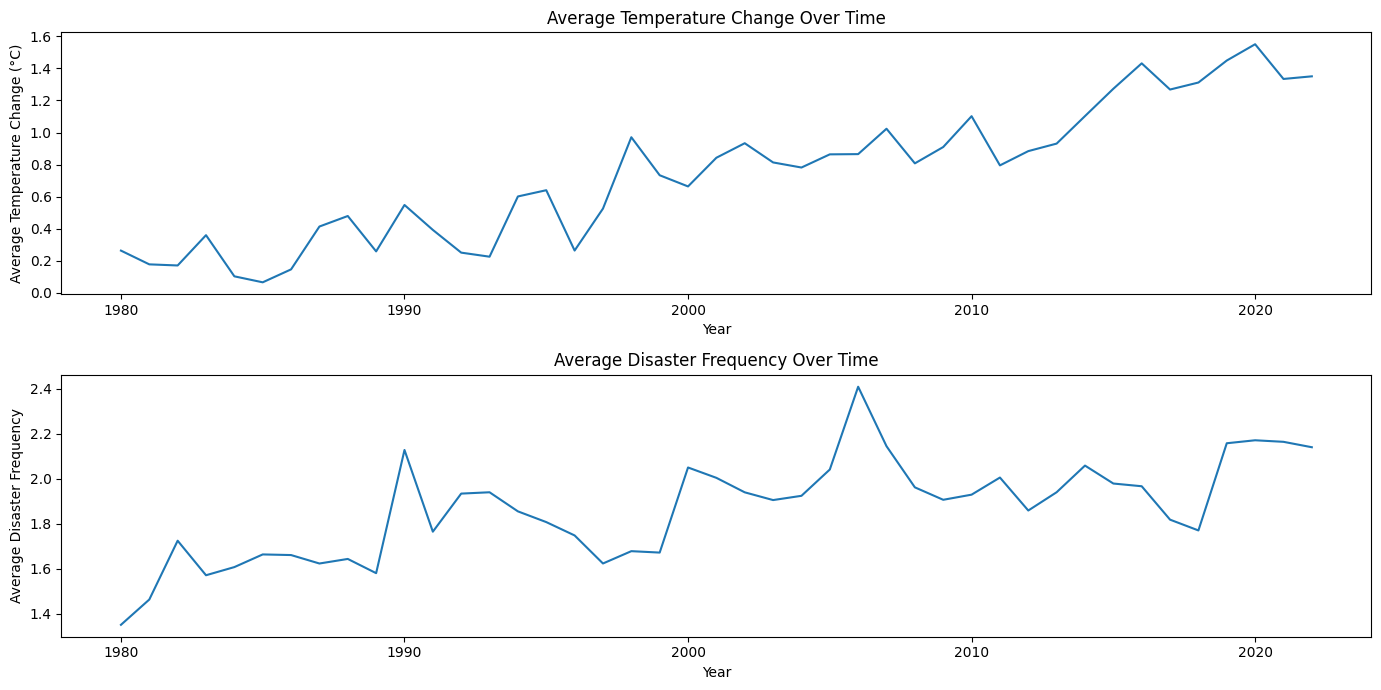

In [29]:
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
sns.lineplot(data=temperature_trends, x='Year', y='Average_Temperature_Change')
plt.title('Average Temperature Change Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature Change (°C)')

plt.subplot(2, 1, 2)
sns.lineplot(data=disaster_trends, x='Year', y='Average_Disaster_Frequency')
plt.title('Average Disaster Frequency Over Time')
plt.xlabel('Year')
plt.ylabel('Average Disaster Frequency')

plt.tight_layout()
plt.show()

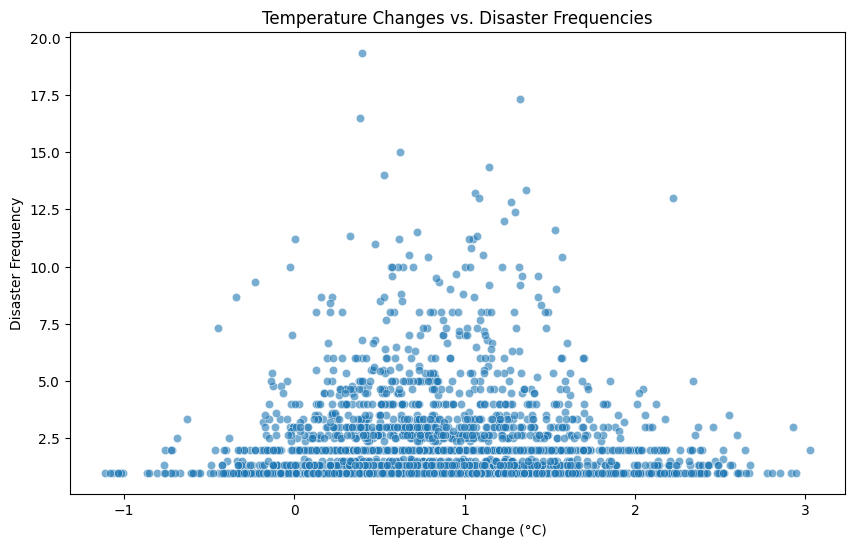

In [32]:
temperature_changes = merged_df[temperature_columns].values.flatten()
disaster_frequencies = merged_df[disaster_columns].values.flatten()

valid_indices = ~pd.isna(temperature_changes) & ~pd.isna(disaster_frequencies)
temperature_changes_valid = temperature_changes[valid_indices]
disaster_frequencies_valid = disaster_frequencies[valid_indices]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=temperature_changes_valid, y=disaster_frequencies_valid, alpha=0.6)
plt.title('Temperature Changes vs. Disaster Frequencies')
plt.xlabel('Temperature Change (°C)')
plt.ylabel('Disaster Frequency')
plt.show()

In [16]:
correlation = pd.DataFrame({
    'Temperature Change (°C)': temperature_changes_valid,
    'Disaster Frequency': disaster_frequencies_valid
}).corr()

correlation

,Temperature Change (°C),Disaster Frequency
Temperature Change (°C),1.000000,0.009271
Disaster Frequency,0.009271,1.000000


Correlation between Average Temperature Change and Total Number of Disasters:
                            Average_Temperature_Change  Total_Disasters
Average_Temperature_Change                    1.000000        -0.090362
Total_Disasters                              -0.090362         1.000000


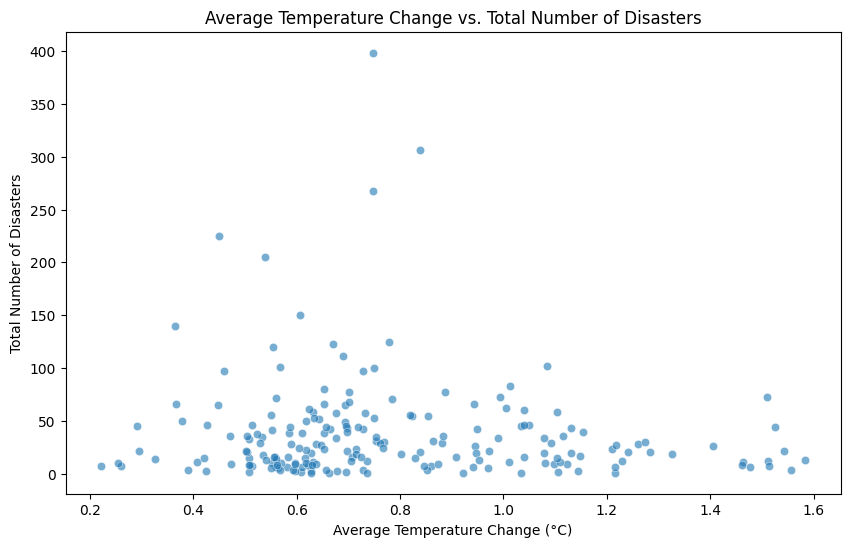

In [21]:
temperature_columns = [col for col in merged_df.columns if '_temp' in col]
disaster_columns = [col for col in merged_df.columns if '_disaster' in col]

merged_df['Average_Temperature_Change'] = merged_df[temperature_columns].mean(axis=1)

merged_df['Total_Disasters'] = merged_df[disaster_columns].sum(axis=1)

correlation = merged_df[['Average_Temperature_Change', 'Total_Disasters']].corr()

print("Correlation between Average Temperature Change and Total Number of Disasters:")
print(correlation)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average_Temperature_Change', y='Total_Disasters', data=merged_df, alpha=0.6)
plt.title('Average Temperature Change vs. Total Number of Disasters')
plt.xlabel('Average Temperature Change (°C)')
plt.ylabel('Total Number of Disasters')
plt.show()

Correlation between Average Temperature Change and Total Number of Disasters:
                            Average_Temperature_Change  Total_Disasters
Average_Temperature_Change                    1.000000        -0.090362
Total_Disasters                              -0.090362         1.000000


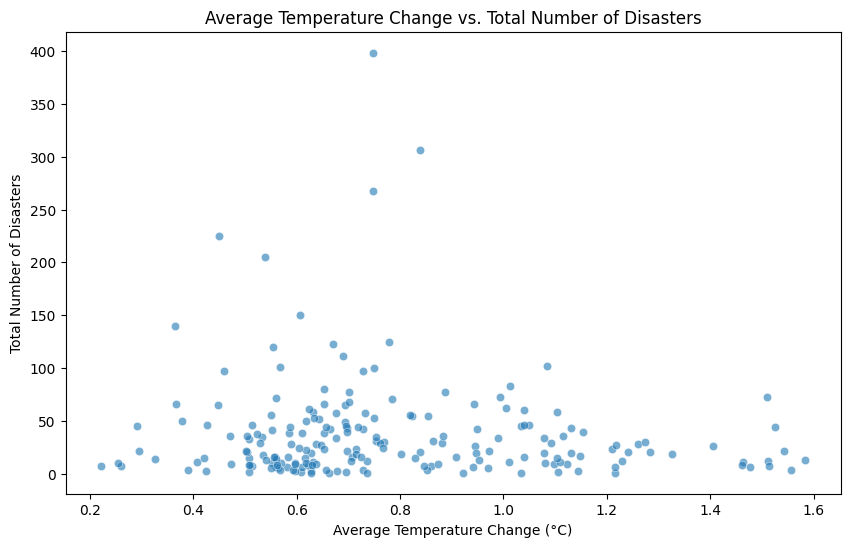

In [23]:
temperature_columns = [col for col in merged_df.columns if '_temp' in col]
disaster_columns = [col for col in merged_df.columns if '_disaster' in col]

merged_df['Average_Temperature_Change'] = merged_df[temperature_columns].mean(axis=1)

merged_df['Total_Disasters'] = merged_df[disaster_columns].sum(axis=1)

correlation = merged_df[['Average_Temperature_Change', 'Total_Disasters']].corr()

print("Correlation between Average Temperature Change and Total Number of Disasters:")
print(correlation)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average_Temperature_Change', y='Total_Disasters', data=merged_df, alpha=0.6)
plt.title('Average Temperature Change vs. Total Number of Disasters')
plt.xlabel('Average Temperature Change (°C)')
plt.ylabel('Total Number of Disasters')
plt.show()


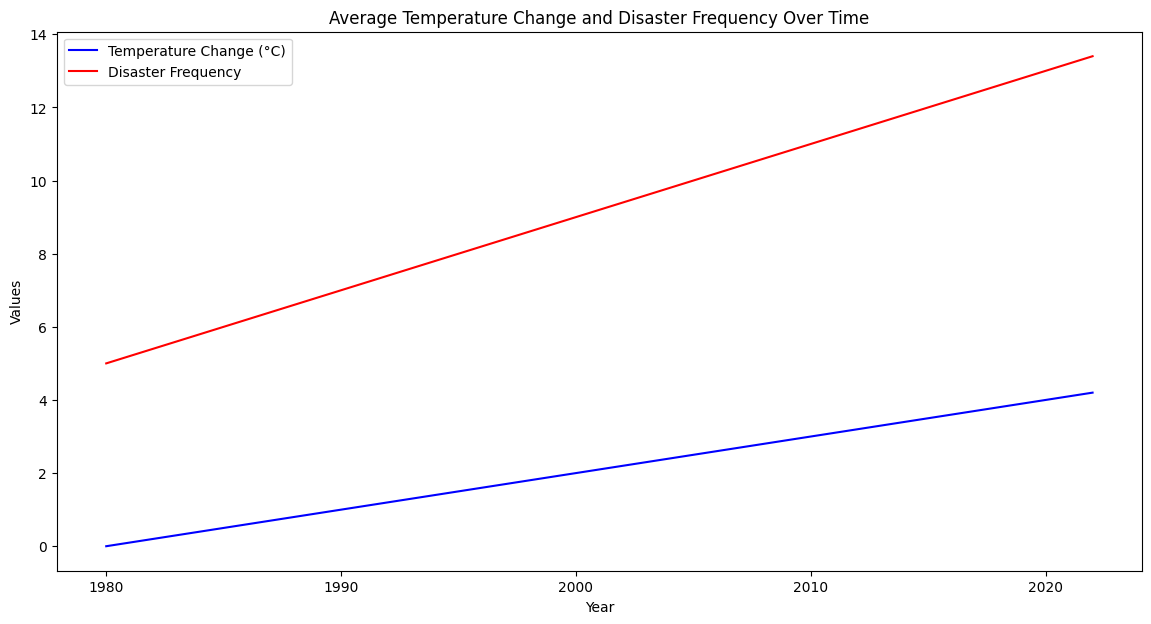

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

temperature_trends = pd.DataFrame({
    'Year': range(1980, 2023),
    'Average_Temperature_Change': [0.1 * i for i in range(43)]
})

disaster_trends = pd.DataFrame({
    'Year': range(1980, 2023),
    'Average_Disaster_Frequency': [5 + 0.2 * i for i in range(43)]
})

plt.figure(figsize=(14, 7))

sns.lineplot(data=temperature_trends, x='Year', y='Average_Temperature_Change', label='Temperature Change (°C)', color='blue')

sns.lineplot(data=disaster_trends, x='Year', y='Average_Disaster_Frequency', label='Disaster Frequency', color='red')

plt.title('Average Temperature Change and Disaster Frequency Over Time')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()
